In [9]:
import numpy as np
import numpy.linalg as npla
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=np.inf)

In [10]:
n = 400
a,b = (0,1)
h = (b-a) / (n-1)
x = np.linspace(a,b,n)

In [11]:
# Discrete derivative

D = np.zeros((n, n))

D[0, 0] = - 3.0
D[0, 1] = 4.0
D[0, 2] = - 1.0

for i in range(1, n - 1):
    D[i, i - 1] = - 1.0
    D[i, i + 1] = 1.0

D[n - 1, n - 3] = 1.0
D[n - 1, n - 2] = - 4.0
D[n - 1, n - 1] = 3.0

print(D)

D = D / (2.0 * h)

[[-3.  4. -1. ...  0.  0.  0.]
 [-1.  0.  1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ... -1.  0.  1.]
 [ 0.  0.  0. ...  1. -4.  3.]]


In [12]:
# diff eq to solve

# LHS
# a_0 * y + a_1 * dy/dx + a_2 * d2y/dx2 + ...
coeffs = [50,14,1]

# keep it as [0,0,1]

if len(coeffs) < 2: raise Exception("bad coeff list")
s = [str(coeffs[0]) + "* y"] + [f"{c} * d{p+1 if p != 0 else ''}y/dx{p+1 if p != 0 else ''}" for p, c in enumerate(coeffs[1:])]

# RHS
rhs_str = "2 * np.e ** (-7 * x) * np.cos(x)"
g = eval(rhs_str)
print(g)
print(f"{' + '.join(s)} = {rhs_str}")

A = coeffs[0] * np.identity(n)
print(A)

for order, coeff in enumerate(coeffs[1:]):
    A += npla.matrix_power(D, order + 1) * coeff

[2.00000000e+00 1.96521210e+00 1.93101718e+00 1.89740533e+00 1.86436682e+00 1.83189209e+00 1.79997172e+00 1.76859644e+00 1.73775715e+00 1.70744487e+00 1.67765080e+00 1.64836626e+00 1.61958272e+00 1.59129179e+00 1.56348522e+00 1.53615488e+00 1.50929280e+00 1.48289111e+00 1.45694209e+00 1.43143814e+00 1.40637179e+00 1.38173568e+00 1.35752258e+00 1.33372538e+00 1.31033709e+00 1.28735082e+00 1.26475980e+00 1.24255738e+00 1.22073702e+00 1.19929227e+00 1.17821680e+00 1.15750438e+00 1.13714889e+00 1.11714430e+00 1.09748469e+00 1.07816423e+00 1.05917719e+00 1.04051793e+00 1.02218091e+00 1.00416068e+00 9.86451874e-01 9.69049222e-01 9.51947538e-01 9.35141724e-01 9.18626764e-01 9.02397727e-01 8.86449763e-01 8.70778102e-01 8.55378054e-01 8.40245007e-01 8.25374425e-01 8.10761847e-01 7.96402888e-01 7.82293235e-01 7.68428645e-01 7.54804949e-01 7.41418044e-01 7.28263898e-01 7.15338545e-01 7.02638085e-01 6.90158684e-01 6.77896571e-01 6.65848038e-01 6.54009440e-01 6.42377191e-01 6.30947768e-01 6.1971770

In [13]:
# boundary conditions
num_boundary_conditions = len(coeffs) - 1
print(num_boundary_conditions)
conditions = [0,.000767322215584]
first = 0
last = 1
if len(conditions) != num_boundary_conditions: raise Exception("Bad boundary condtions")

f_BC = np.array([first] + [0] * (n - num_boundary_conditions) + [last])

2


In [14]:
P = np.vstack(([0 for _ in range(n - num_boundary_conditions)], np.identity(n - num_boundary_conditions), [0 for _ in range(n - num_boundary_conditions)]))
R = P.transpose()

In [15]:
# RAP_mat = np.dot(R, A, P)
print(R.shape)
print(A.shape)
print(P.shape)

f = np.dot(npla.inv(np.dot(np.dot(R, A), P)), np.dot(R, (g - np.dot(A, f_BC))))


(398, 400)
(400, 400)
(400, 398)


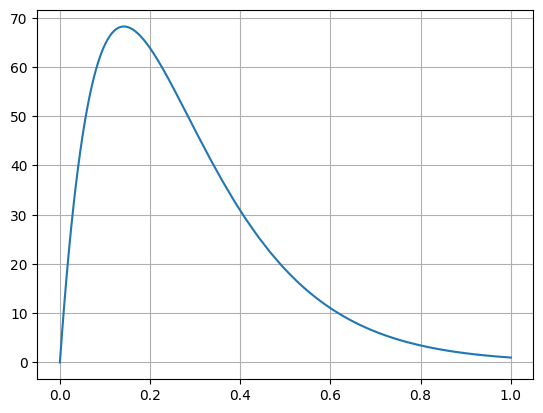

In [16]:
y_values = np.dot(P, f) + f_BC
plt.plot(x, y_values)
plt.grid()
plt.show()